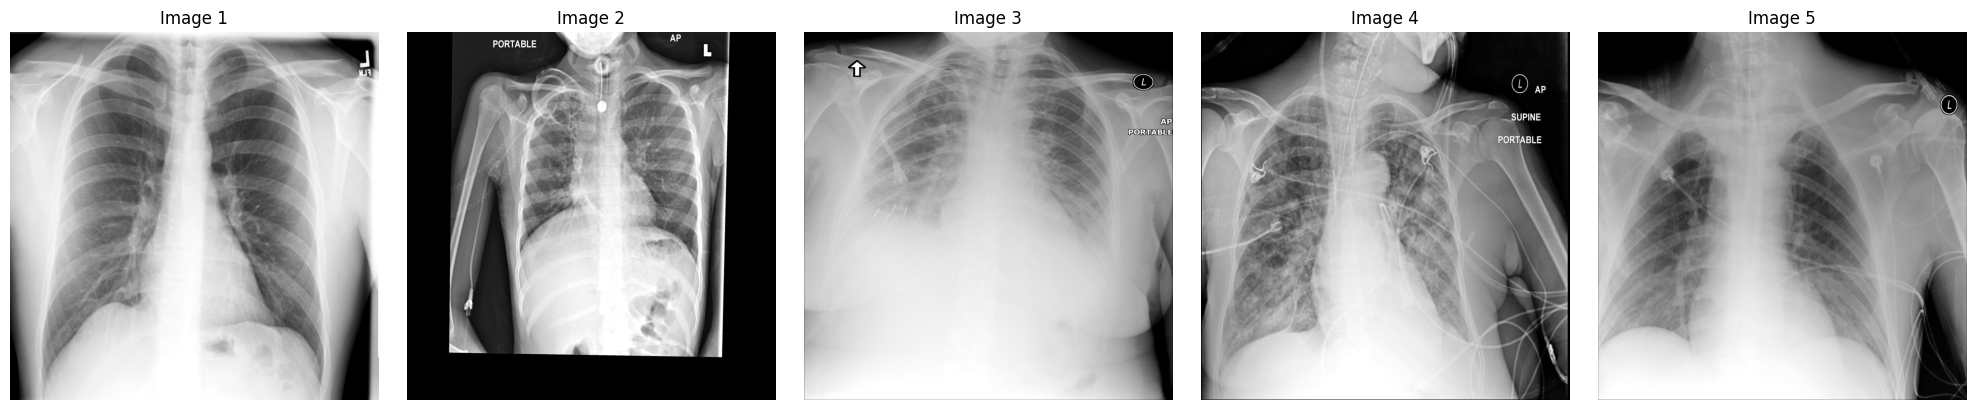

Total preprocessed images: 1000


In [4]:
import os
import pydicom
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Directory containing DICOM files
dicom_dir = "dicom_files"

# Function to preprocess DICOM image
def preprocess_dicom(dicom_file):
    # Read DICOM file
    ds = pydicom.dcmread(dicom_file)
    
    # Extract pixel array
    img = ds.pixel_array
    
    # Convert to float and normalize to [0, 1]
    img = img.astype(float) / np.max(img)
    
    # Apply contrast stretching
    p2, p98 = np.percentile(img, (2, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    
    return img_rescale

# List to store preprocessed images
preprocessed_images = []

# Preprocess first 100 images
for i, filename in enumerate(os.listdir(dicom_dir)[:1000]):
    if filename.endswith(".dcm"):
        file_path = os.path.join(dicom_dir, filename)
        preprocessed_img = preprocess_dicom(file_path)
        preprocessed_images.append(preprocessed_img)


# Display first 5 preprocessed images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    ax.imshow(preprocessed_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

print(f"Total preprocessed images: {len(preprocessed_images)}")

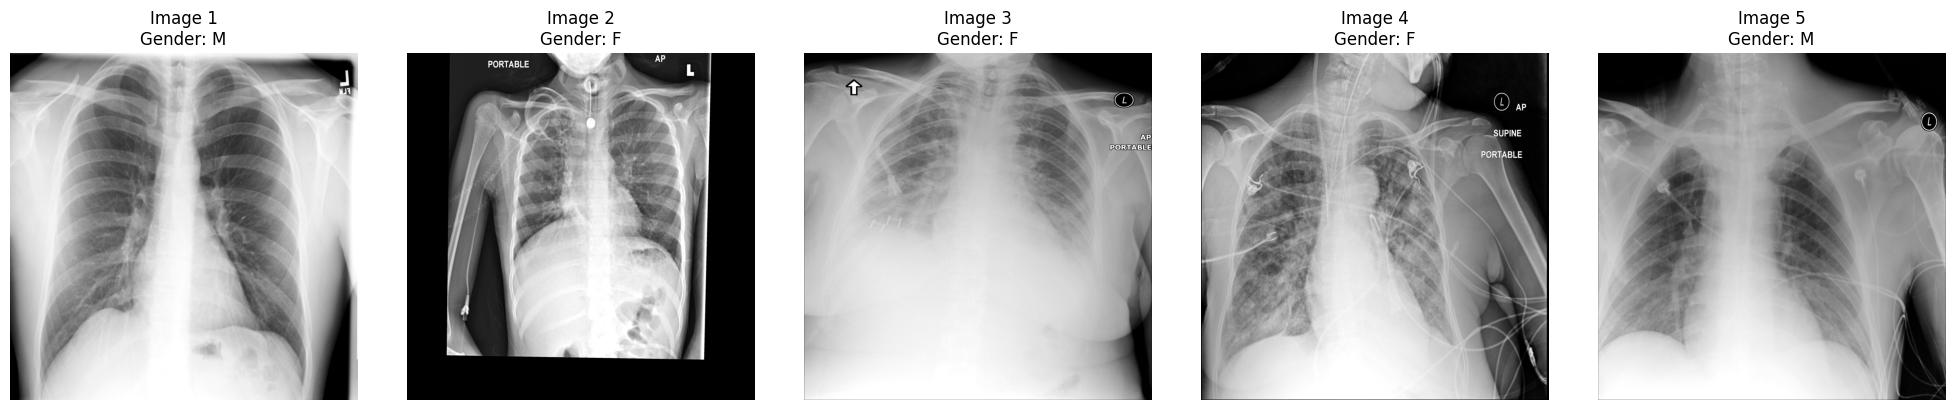

Gender distribution:
M: 49
F: 51

Total preprocessed images: 1000


In [5]:
# Display first 5 preprocessed images
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes):
    ax.imshow(preprocessed_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Image {i+1}\nGender: {genders[i]}")

plt.tight_layout()
plt.show()

# Count and display gender distribution
gender_counts = Counter(genders)
print("Gender distribution:")
for gender, count in gender_counts.items():
    print(f"{gender}: {count}")

print(f"\nTotal preprocessed images: {len(preprocessed_images)}")

## Metadata Extraction


In [7]:
# Function to extract patient gender from DICOM metadata
def extract_patient_gender(file_path):
    """
    This function reads a DICOM file and extracts the patient's gender from the metadata.
    
    Parameters:
    file_path (str): Path to the DICOM file
    
    Returns:
    str: Patient's gender (if available)
    """
    # Load the DICOM file
    dicom_file = pydicom.dcmread(file_path)
    
    # Extract patient gender from metadata (if available)
    if 'PatientSex' in dicom_file:
        return dicom_file.PatientSex
    else:
        return "Unknown"

# List to store patient genders
patient_genders = []

# Extract patient gender from each DICOM file
for dicom_file in dicom_files:
    gender = extract_patient_gender(dicom_file)
    patient_genders.append(gender)

# Display the extracted patient genders
for i, gender in enumerate(patient_genders[:5]):
    print(f'Patient Gender for Image {i+1}: {gender}')


NameError: name 'dicom_files' is not defined

In [6]:
import pandas as pd

# List to store patient metadata
patient_metadata = []

# Extract metadata from each DICOM file
for dicom_file in dicom_files:
    dicom_data = pydicom.dcmread(dicom_file)
    metadata = {
        "File": dicom_file,
        "PatientID": dicom_data.PatientID if 'PatientID' in dicom_data else "Unknown",
        "PatientSex": dicom_data.PatientSex if 'PatientSex' in dicom_data else "Unknown",
        "PatientAge": dicom_data.PatientAge if 'PatientAge' in dicom_data else "Unknown",
    }
    patient_metadata.append(metadata)

# Convert to pandas DataFrame
metadata_df = pd.DataFrame(patient_metadata)

# Display the first 5 rows of the DataFrame
metadata_df.head()


,File,PatientID,PatientSex,PatientAge
0,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,17d405a3-a0d2-4901-b33a-63906aa48d9f,M,38
1,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,8ab1ffda-8b65-4914-95d6-2e549e328666,F,10
2,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,bfef51d3-6541-4792-bac1-d21d41ee60fd,F,50
3,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,d19d956f-4ddd-4688-81ff-909c85e0e2d9,F,68
4,dicom_files\1.2.276.0.7230010.3.1.4.8323329.10...,cf71a760-f693-4ccf-acd4-a41ff4845a5f,M,65
